In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
import muscle
import muscle_utils

In [3]:
biceps = muscle.Muscle()

In [4]:
length = np.linspace(-150, 50, 50)
vel = np.linspace(-800, 400, 50)

In [5]:
## 3D force plot
x, y = np.meshgrid(length, vel)
z = biceps.__get_force_estimate__(length=x, velocity=y, activation_level=1)
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.plot_surface(x, y, z)
#plt.gca().invert_xaxis()
data = np.vstack([x.flatten(), y.flatten(), z.flatten()])
np.savetxt('bicpes_3D.dat', data.T, fmt="%f %f %f")
# sed -E "s/^-150.*/\n&/g" < test.dat > test2.dat

In [6]:
## 2D force plot
#plt.figure()
y = biceps.__get_force_estimate__(length=length, velocity=0, activation_level=1)
#plt.plot(length, y)
np.savetxt('bicpes_len.dat', np.vstack([length, y]).T, fmt="%f %f")

#plt.figure()
y = biceps.__get_force_estimate__(length=0, velocity=vel, activation_level=1)
#plt.plot(vel, y)
np.savetxt('bicpes_vel.dat', np.vstack([vel, y]).T, fmt="%f %f")

In [83]:
length = np.linspace(-150, 60, 50)
vel = 0
#length, vel = np.meshgrid(length, vel)

Fcemax = 461.76
Lmax = 404.6
Lts = 229.8
Lce0 = 130.7
alpha = 0.56
phi_m=0.1
phi_v=0.5
spe = 9

a = 1
# CE Element
# Real-Time Myoprocessors for a Neural Controlled Powered Exoskeleton Arm
Vcemax = 2 * Lce0 + 8 * Lce0 * alpha
Vce0 = 1/2 * (a + 1) * Vcemax

fl = np.exp(-1/2 * ((length/Lce0 - phi_m) / phi_v) ** 2)
fv = 0.1433 / (0.1074 + np.exp(-1.3 * np.sinh(2.8 * vel / Vce0 + 1.64)))
Fce = a * fl * fv * Fcemax

# PE Element
# Real-Time Myoprocessors for a Neural Controlled Powered Exoskeleton Arm
Fpemax = 0.05 * Fcemax
DLpemax = Lmax - (Lce0 + Lts)

Fpe = Fpemax / (np.exp(spe) - 1) * (np.exp(spe/DLpemax * length) - 1)

Ftot = Fce + Fpe

In [85]:
#np.savetxt('fl.dat', np.vstack([length, fl]).T, fmt="%f %f")
#np.savetxt('gv.dat', np.vstack([vel, fv]).T, fmt="%f %f")
np.savetxt('fce.dat', np.vstack([length, Fce]).T, fmt="%f %f")
np.savetxt('fpe.dat', np.vstack([length, Fpe]).T, fmt="%f %f")

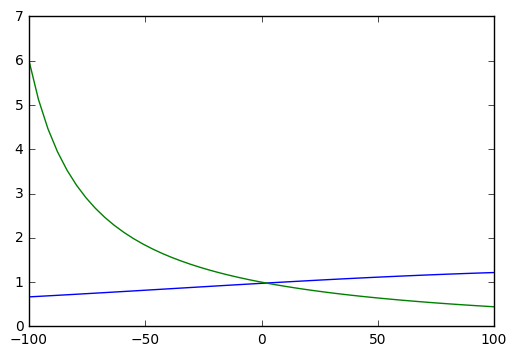

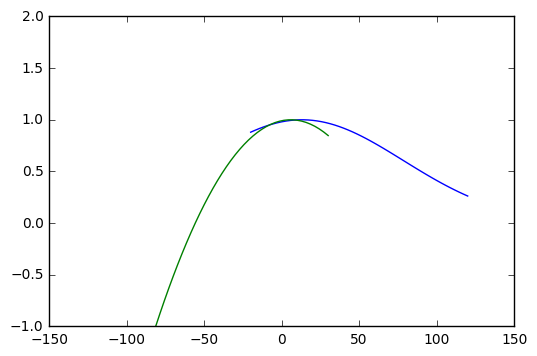

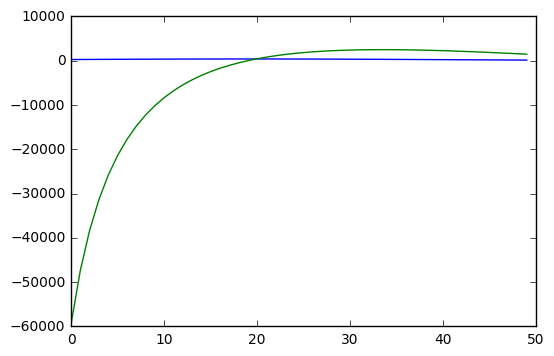

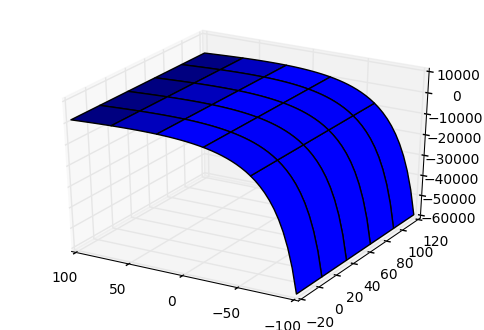

In [92]:
Vmax = 0.5e3
y1 = (1-vel/Vmax) / (1+4*vel/Vmax)
plt.plot(vel, fv)
plt.plot(vel, y1)

Lopt = 0.0959e3
w = 0.643
plt.figure()
y2 = 1 - (((length)/Lopt - 1)/w)**2
plt.plot(length, fl)
plt.plot(length-90, y2)
plt.ylim([-1, 2])

plt.figure()
plt.plot(Fce)
plt.plot(3913*y1*y2)

x, y = np.meshgrid(vel, length)
z1 = (1-vel/Vmax) / (1+4*vel/Vmax)
z2 = 1 - (((length)/Lopt - 1)/w)**2
z = 3913*z1*z2

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z)
plt.gca().invert_xaxis()

In [8]:
triceps = muscle.Muscle(
  muscle_type=muscle_utils.MUSCLE_NAME.TRICEPS_BRACHII, # Should be changed to muscle_name
  max_length=189.5,
  optimal_fiber_length=49.0,
  tensor_slack_length=121.9,
  max_force=1000,
  alpha=0.66,
  spe=10,
  phi_m=0.1,
  phi_v=0.9
)

In [18]:
length = np.linspace(-150, 150, 50)
vel = np.linspace(-400, 400, 50)
x, y = np.meshgrid(vel, length)
z = triceps.__get_force_estimate__(length=y, velocity=0, activation_level=0.2)
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.plot_surface(x, y, z)

NameError: name 'triceps' is not defined